In [56]:
import torch

import torchvision
from torchvision import transforms
from torchvision.models import resnet18, resnet34, resnet50, resnet101, efficientnet_b7, vit_b_32

from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

from PIL import Image

import numpy as np

import torch.nn.functional as F

# https://pytorch.org/vision/0.12/models.html

In [2]:
torch.__version__, torchvision.__version__

('1.11.0+cu113', '0.12.0+cu113')

In [57]:
# model = resnet18(pretrained=True)
# model = resnet34(pretrained=True)
# model = resnet50(pretrained=True) # 482
model = resnet101(pretrained=True) # 165

# model = efficientnet_b7(pretrained=True)

model = vit_b_32(pretrained=True)

model.eval()
pass


Downloading: "https://download.pytorch.org/models/vit_b_32-d86f8d99.pth" to /home/djagatiya/.cache/torch/hub/checkpoints/vit_b_32-d86f8d99.pth
100.0%


`transforms.ToTensor` : Convert from PIL or numpy array [int 0,255] [H,W,C] -> [float 0.0, 0.1] [C,H,W]

`transforms.PILToTensor` : Convert PIL [H,W,C] -> Tensor [C,H,W] (uint8)[0, 255]

In [58]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

compose = transforms.Compose([
            transforms.Resize(128 * 2),
            transforms.CenterCrop(112 * 2),
            transforms.ToTensor(),
            normalize,
        ])

train_loader = DataLoader(ImageFolder("../input/images/", compose), batch_size=1)

In [59]:
with open("imagenet_class_index.json") as f:
    idx2label = eval(f.read())

---------------------------------
torch.Size([1, 3, 224, 224])
torch.float32 torch.Size([224, 224, 3]) tensor(-1.9295) tensor(2.4308)


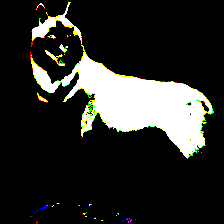

250
tensor(0.4901)
['n02110185', 'Siberian_husky']
---------------------------------
torch.Size([1, 3, 224, 224])
torch.float32 torch.Size([224, 224, 3]) tensor(-2.1179) tensor(2.6400)


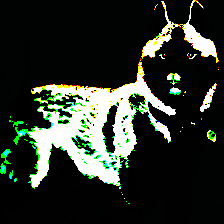

248
tensor(0.6512)
['n02109961', 'Eskimo_dog']
---------------------------------
torch.Size([1, 3, 224, 224])
torch.float32 torch.Size([224, 224, 3]) tensor(-1.9124) tensor(2.6051)


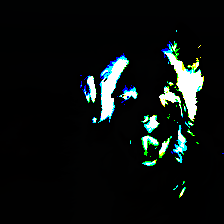

231
tensor(0.4505)
['n02106030', 'collie']
---------------------------------
torch.Size([1, 3, 224, 224])
torch.float32 torch.Size([224, 224, 3]) tensor(-2.1179) tensor(2.5877)


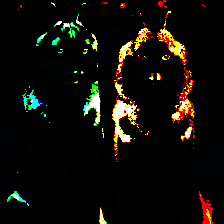

250
tensor(0.4434)
['n02110185', 'Siberian_husky']


In [60]:
def decode_image(input):
    img = input[0]
    img = np.transpose(img, [1,2,0])
    print(img.dtype, img.shape, img.min(), img.max())
    display(Image.fromarray(np.uint8(img)))
    

for inp, label in train_loader:
    print("---------------------------------")

    print(inp.shape)

    decode_image(inp)

    with torch.no_grad():
        pred = model(inp).detach()
        pred = F.softmax(pred,dim=1)
        # print(pred)
        a_max = int(pred.argmax(dim=1))
        print(a_max)
        print(pred[0][a_max])
        print(idx2label[str(a_max)])

    

    # print(Image.fromarray(inp.numpy()[1:]))


In [44]:
np.array(Image.open("../input/images/dogs/collie-beach-bokeh.jpg")).shape

(667, 1000, 3)

In [19]:
# model

Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /home/djagatiya/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100.0%
